# **Часть 2. Задача классификации**
Датасет: https://www.kaggle.com/competitions/titanic

Задачи:

А. Решение задачи классификации
1. Построить модель линейной классификации. При решении задачи методом градиентного спуска, необходимо вычислить градиент с помощью матрицы признаков.
2. Построить модель на основе случайного леса классифицирующих деревьев. Определить параметры классификатора (количество деревьев, максимальная глубина дерева), при которых точность классификации максимальна.

Б. Анализ ROC/PR-кривых
1. Рассмотреть простейшую задачу двухклассовой классификации, в которой элементы выборки имеют нормальное распределение с дисперсией 1 и средними значениями +𝝁 для экземпляров одного класса и -𝝁 для экземпляров другого класса. Экземпляры каждого класса появляются в обучающей выборке с вероятностью ½. Для данной задачи необходимо определить оптимальный классификатор, а также построить ROC-кривую для различных значений 𝝁.
2. Для двух моделей, полученных в п.А., построить ROC и PR (precision-recall) кривые. Получить значения площадей под этими кривыми. Какая метрика (ROC-AUC или PR-AUC) является более предпочтительной в данном примере и почему?


In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [195]:
y_test=pd.read_csv("gender_submission.csv").set_index('PassengerId')

In [196]:
df_train = pd.read_csv("train.csv").set_index('PassengerId')
x_test = pd.read_csv("test.csv").set_index('PassengerId')

# **Обработка данных**

In [197]:
print('\nNumber of rows and columns in the data set: ',df_train.shape)
print('')

df_train.head()


Number of rows and columns in the data set:  (891, 11)



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [198]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


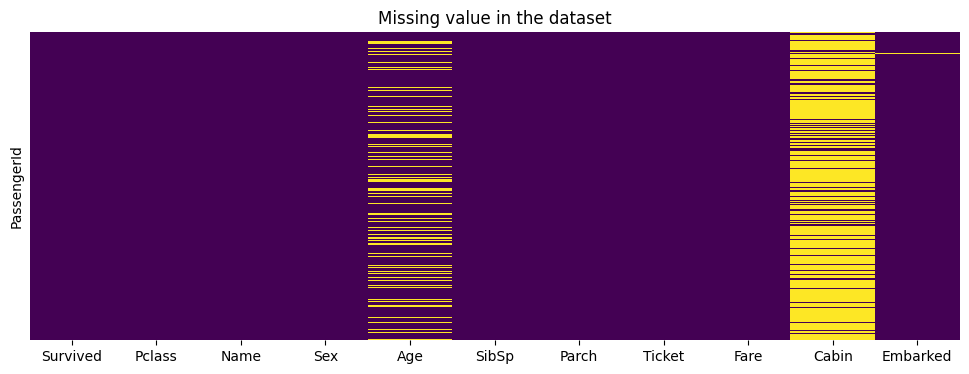

In [199]:
plt.figure(figsize=(12,4))
sns.heatmap(df_train.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [200]:
df_train.duplicated().sum()

0

In [201]:
df_train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [202]:
print('\nNumber of rows and columns in the data set: ',x_test.shape)
print('')

x_test.head()


Number of rows and columns in the data set:  (418, 10)



,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [203]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


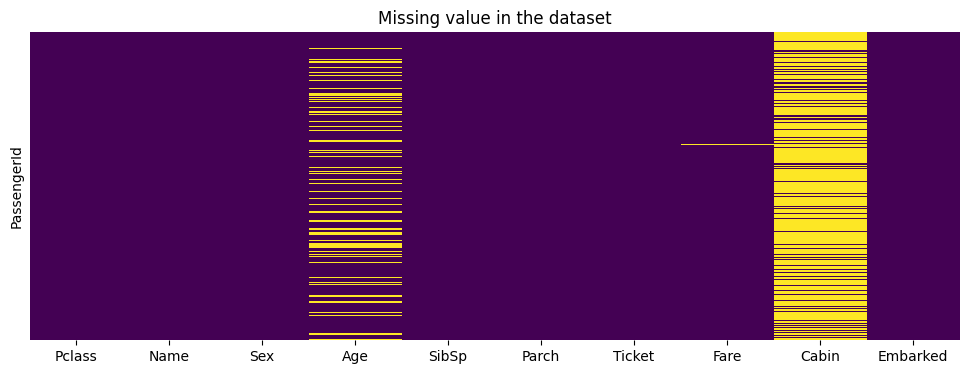

In [204]:
plt.figure(figsize=(12,4))
sns.heatmap(x_test.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [205]:
x_test.duplicated().sum()

0

In [206]:
x_test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [207]:
df_train["Age"] = df_train["Age"].fillna(-0.5)
x_test["Age"] = x_test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df_train['AgeGroup'] = pd.cut(df_train["Age"], bins, labels = labels)
x_test['AgeGroup'] = pd.cut(x_test["Age"], bins, labels = labels)

In [208]:
df_train["CabinBool"] = (df_train["Cabin"].notnull().astype('int'))
x_test["CabinBool"] = (x_test["Cabin"].notnull().astype('int'))

In [209]:
# df_train = df_train['Embarked'].fillna({"Embarked" : "S"})

In [210]:
df_train_vis = df_train[["Sex", "Pclass", "SibSp", "Parch", "AgeGroup", "CabinBool", "Embarked"]]

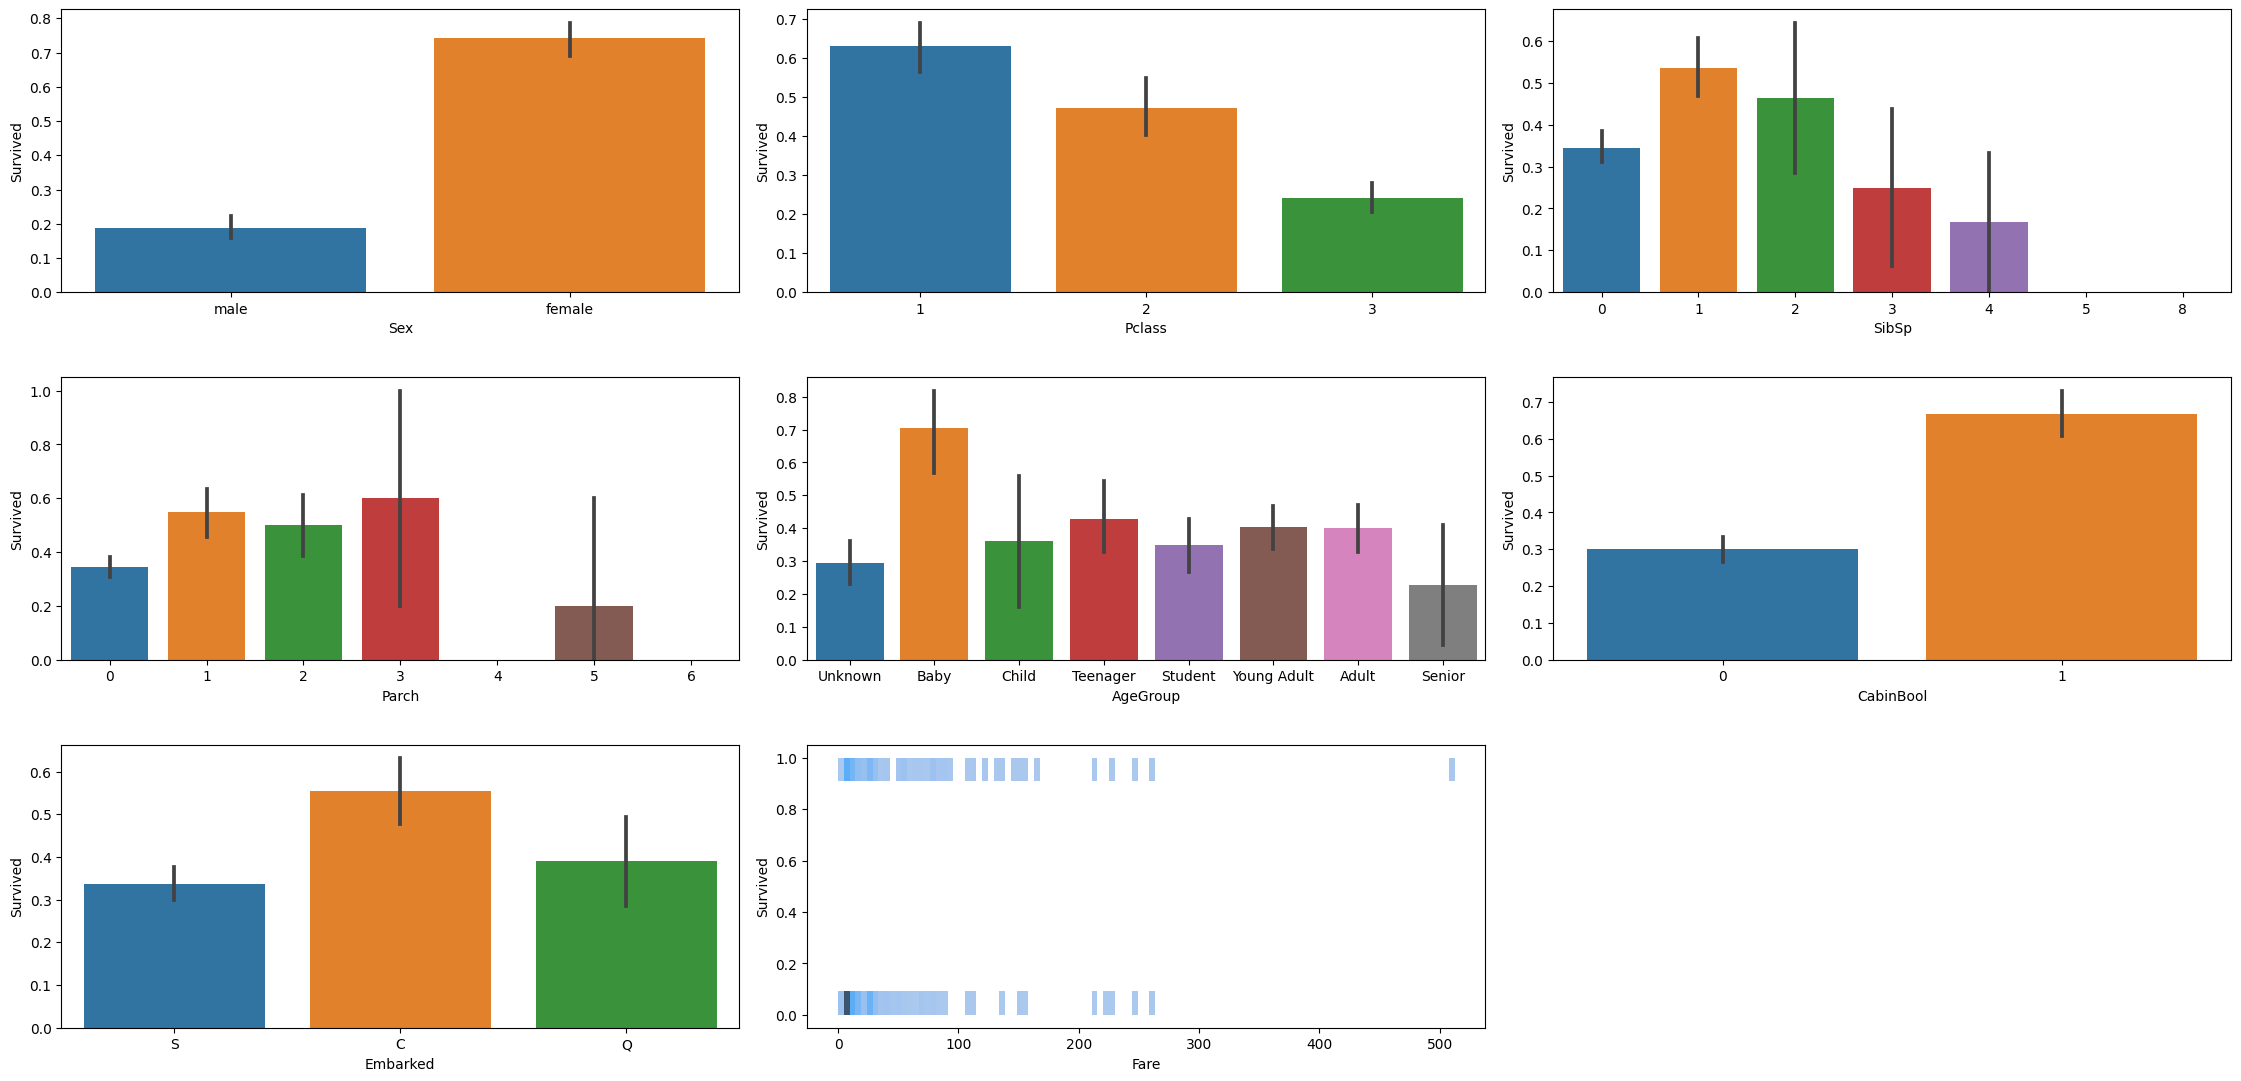

In [211]:
plt.figure(figsize=(28,18))

for index,column in enumerate(df_train_vis):
    plt.subplot(4,3,index+1)
    sns.barplot(data=df_train,y="Survived", x = column)

plt.subplot(4,3,index+2)
sns.histplot(data = df_train, x="Fare", y="Survived", kde=True)

plt.subplots_adjust(wspace=0.1,hspace=0.3)

In [212]:
df_train = df_train.drop(["Cabin"], axis = 1)
x_test = x_test.drop(["Cabin"], axis = 1)

In [213]:
df_train = df_train.drop(["Ticket"], axis = 1)
x_test = x_test.drop(["Ticket"], axis = 1)

In [214]:
df_train = df_train.fillna({"Embarked": "S"})

In [215]:
combine = [df_train, x_test]

for dataset in combine:
  dataset["Title"] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df_train["Title"], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [216]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [217]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,Mr


In [218]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": "1", "Miss": "2", "Mrs": "3", "Master": "4", "Royal": "5", "Rare": "6"}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)


# df_train["Title"] = df_train["Title"].astype("int64")
# x_test["Title"] = x_test["Title"].astype("int64")
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [219]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [220]:
age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

df_train_cache = df_train["Title"]
df_train["Title"] = df_train["Title"].replace({"1": "Young Adult", "2": "Student", "3": "Adult", "4": "Baby", "5": "Adult", "6": "Adult"})
df_train.loc[df_train["AgeGroup"] == "Unknown", "AgeGroup"] = df_train.loc[df_train["AgeGroup"] == "Unknown", "Title"]
df_train["Title"] = df_train_cache

x_test_cache = x_test["Title"]
x_test["Title"] = x_test["Title"].replace({"1": "Young Adult", "2": "Student", "3": "Adult", "4": "Baby", "5": "Adult", "6": "Adult"})
x_test.loc[x_test["AgeGroup"] == "Unknown", "AgeGroup"] = x_test.loc[x_test["AgeGroup"] == "Unknown", "Title"]
x_test["Title"] = x_test_cache

df_train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1
6,0,3,"Moran, Mr. James",male,-0.5,0,0,8.4583,Q,Young Adult,0,1
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Adult,1,1
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Baby,0,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Young Adult,0,3


In [221]:
df_train = df_train.drop(["Name"], axis = 1)
x_test = x_test.drop(["Name"], axis = 1)

In [222]:
sex_mapping = {"male": 0, "female": 1}
df_train['Sex'] = df_train['Sex'].map(sex_mapping)
x_test['Sex'] = x_test['Sex'].map(sex_mapping)

In [223]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df_train['Embarked'] = df_train['Embarked'].map(embarked_mapping)
x_test['Embarked'] = x_test['Embarked'].map(embarked_mapping)

In [224]:
for index, row in x_test[x_test["Fare"].isnull()].iterrows():
    pclass = row["Pclass"]
    x_test.at[index, "Fare"] = round(df_train[df_train["Pclass"] == pclass]["Fare"].mean(), 4)

#map Fare values into groups of numerical values
df_train['FareBand'] = pd.qcut(df_train['Fare'], 4, labels = [1, 2, 3, 4])
x_test['FareBand'] = pd.qcut(x_test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
df_train = df_train.drop(['Fare'], axis = 1)
x_test = x_test.drop(['Fare'], axis = 1)

In [225]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
df_train['AgeGroup'] = df_train['AgeGroup'].map(age_mapping)
x_test['AgeGroup'] = x_test['AgeGroup'].map(age_mapping)

df_train.head()

#dropping the Age feature for now, might change
df_train = df_train.drop(['Age'], axis = 1)
x_test = x_test.drop(['Age'], axis = 1)

In [226]:
df_train = df_train.astype(int)
x_test = x_test.astype(int)

<Axes: >

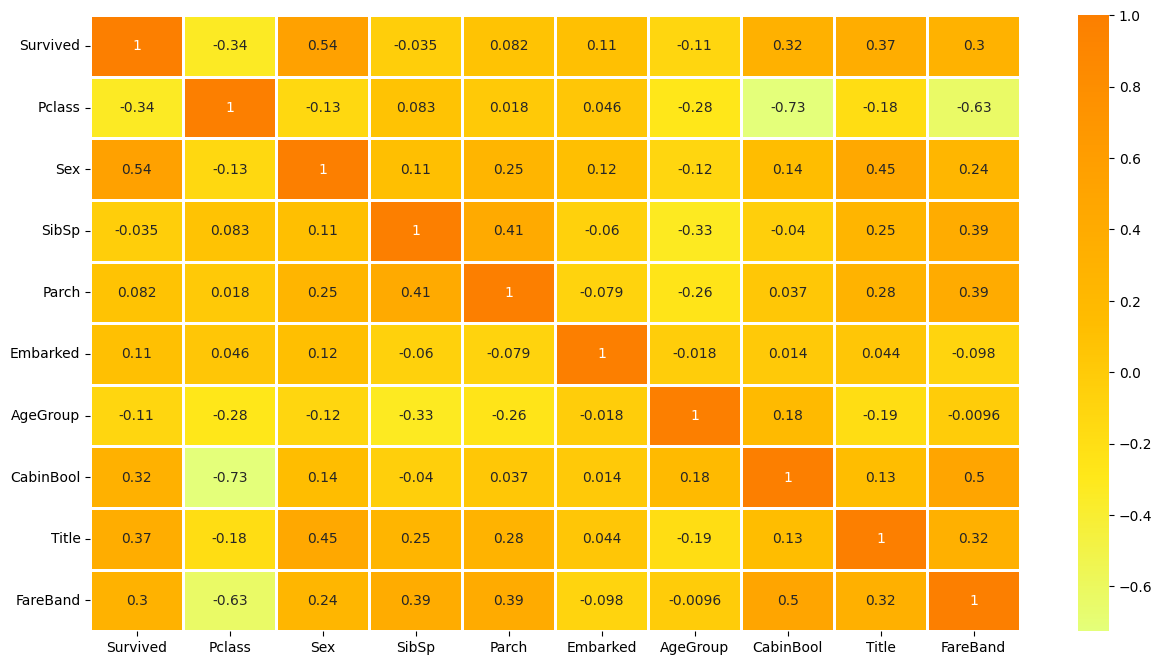

In [227]:
correlation = df_train.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=correlation,cmap = 'Wistia', lw = 1, annot = True)

In [228]:
correlation[["Survived"]]

,Survived
Survived,1.000000
Pclass,-0.338481
Sex,0.543351
SibSp,-0.035322
Parch,0.081629
Embarked,0.106811
AgeGroup,-0.106868
CabinBool,0.316912
Title,0.373139
FareBand,0.299357


In [229]:
df_train = df_train.drop(['Pclass'], axis = 1)
x_test = x_test.drop(['Pclass'], axis = 1)

In [230]:
from imblearn.over_sampling import RandomOverSampler

y_train = df_train["Survived"]
x_train = df_train.drop(["Survived"], axis = 1)

under_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

x_train, y_train = under_sampler.fit_resample(x_train, y_train)

# **Линейнная классификация**

## **sklearn**

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.metrics import classification_report


model = LogisticRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print(classification_report(y_test, y_pred))

Accuracy: 0.8899521531100478
Confusion Matrix:
 [[224  42]
 [  4 148]]
Mean Squared Error: 0.11004784688995216
              precision    recall  f1-score   support

           0       0.98      0.84      0.91       266
           1       0.78      0.97      0.87       152

    accuracy                           0.89       418
   macro avg       0.88      0.91      0.89       418
weighted avg       0.91      0.89      0.89       418



In [232]:
x_test.shape

(418, 8)

## **Ручной метод**

In [233]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_proba(w, intercept, X):
    return sigmoid(np.dot(X, w) + intercept)

def predict(w, intercept, X, threshold=0.5):
    return np.array(list(map(int, predict_proba(w, intercept, X) > threshold)))

def log_loss(w, intercept, X, y):
    p = predict_proba(w, intercept, X)
    l = X.shape[0]
    return - (1 / l) * np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

def grad_log_loss(w, X, y):
    p = sigmoid(np.dot(X, w))
    l = X.shape[0]
    grad = (1 / l) * np.dot(X.T, (p - y))
    return grad

def fit_LogReg(X, y, w=[], eta=1, eps=1e-6, max_iter=1e2):
    X = np.array(X)
    intercept_col = np.ones((len(X), 1))
    X = np.hstack((X, intercept_col))
    y = np.array(y).reshape(-1)
    w = np.zeros(X.shape[1]) if not w else np.array(w)

    weight_dist = np.inf
    iter_num = 0

    while (weight_dist > eps) and (iter_num < max_iter):
        w_new = w - eta * grad_log_loss(w, X, y)
        weight_dist = np.linalg.norm(w_new - w)
        iter_num += 1
        w = w_new

    intercept = w[-1]
    w = w[:-1]

    return w, intercept


Точность работы оказалась практически идентичной

In [234]:
weight, intercept = fit_LogReg(x_train, y_train, eta=1, eps=1e-6, max_iter=1e4)

y_pred = predict(weight, intercept, x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print(classification_report(y_test, y_pred))

Accuracy: 0.9354066985645934
Confusion Matrix:
 [[249  17]
 [ 10 142]]
Mean Squared Error: 0.0645933014354067
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       266
           1       0.89      0.93      0.91       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.93       418
weighted avg       0.94      0.94      0.94       418



## **Случайный лес**

Точность работы случайного леса оказалась ниже, возможно диапазон просмотра параметров не попал на наиболее подходящие

In [236]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Параметры для перебора
param_grid = {
    'n_estimators': [460],
    'max_depth': [11]
}

# Создание модели случайного леса
rf_classifier = RandomForestClassifier(random_state=42)

# Инициализация GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=3)

# Поиск оптимальных параметров
grid_search.fit(x_train, y_train)

# Вывод оптимальных параметров
print("Оптимальные параметры:", grid_search.best_params_)

# Получение предсказаний на тестовом наборе
y_pred = grid_search.predict(x_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Вывод матрицы ошибок (confusion matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Расчет MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print(classification_report(y_test, y_pred))


Оптимальные параметры: {'max_depth': 11, 'n_estimators': 460}
Accuracy: 0.8301435406698564
Confusion Matrix:
 [[218  48]
 [ 23 129]]
Mean Squared Error: 0.16985645933014354
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       266
           1       0.73      0.85      0.78       152

    accuracy                           0.83       418
   macro avg       0.82      0.83      0.82       418
weighted avg       0.84      0.83      0.83       418



# **Анализ ROC/PR-кривых**

## **Пункт 2**

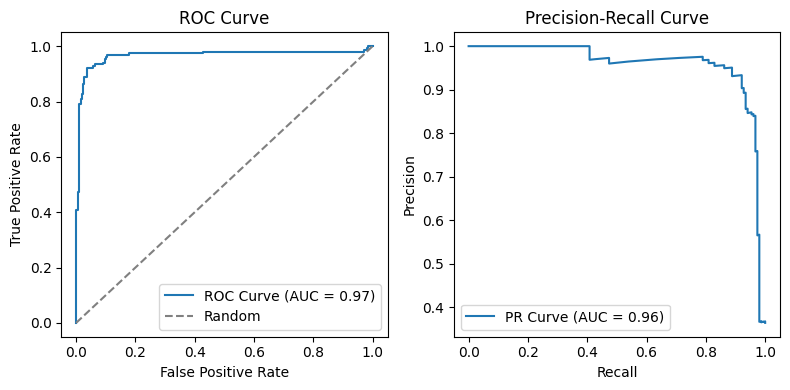

In [239]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

weight, intercept = fit_LogReg(x_train, y_train, eta=1, eps=1e-6, max_iter=1e4)

y_prob = predict_proba(weight, intercept, x_test)
y_pred = predict(weight, intercept, x_test)

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

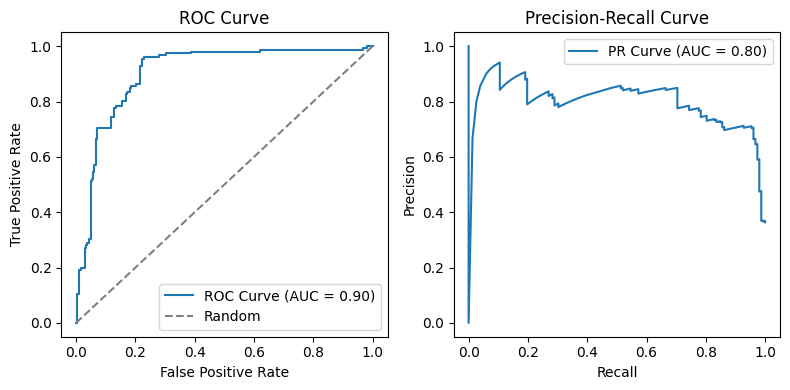

In [240]:
y_prob = grid_search.predict_proba(x_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

Так как целевой показатель имеет сильный дизбаланс, то PR-AUC более предпочтительна.

## **Пункт 1**

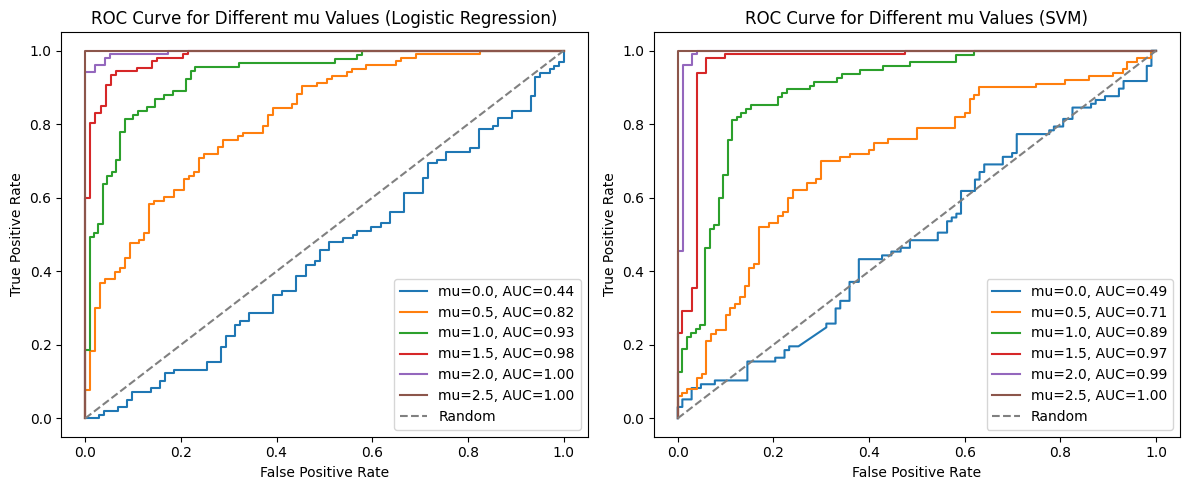

In [241]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from scipy.stats import norm

# Функция для создания выборки с различными значениями среднего
def generate_data(mu, size=1000):
    class_labels = np.random.randint(2, size=size)
    data = np.random.randn(size) + mu * (2 * class_labels - 1)
    return data, class_labels

# Значения среднего для экземпляров классов
mu_values = np.arange(0, 3, 0.5)

# Создание подзадач для различных значений mu
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Логистическая регрессия
for mu in mu_values:
    X, y = generate_data(mu)
    X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    axes[0].plot(fpr, tpr, label=f'mu={mu}, AUC={roc_auc:.2f}')

axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve for Different mu Values (Logistic Regression)')
axes[0].legend()

# SVM с ядром RBF
for mu in mu_values:
    X, y = generate_data(mu)
    X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)

    model = SVC(kernel='rbf', probability=True)
    model.fit(X_train, y_train)

    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    axes[1].plot(fpr, tpr, label=f'mu={mu}, AUC={roc_auc:.2f}')

axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve for Different mu Values (SVM)')
axes[1].legend()

plt.tight_layout()
plt.show()

Из формы графиков ROC можно сказать, что классификатор SVM имеет более прямой угол линии, что говорит о лучшей классификации.